

# Project: Tmdb Movie Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report I have analysed Tmdb movies dataset to investigate the insight of the data to draw up meaningful conclusions by producing statistical summaries and visualisations. This dataset has information about  movie, for example the year it released, the director and casts of the movie, budget, revenue it generated, it's popularity level etc. I have genrated few questions to investigate and visualise the insight of the dataset.

> 1. Is popularity of genre changing over years?
> 2. What are the production companies dominating the movie industry and what types of movies they produced?
> 3. How revenue generated by the top production companies has changed over years?
> 4. Do companies produced popular movies genrates high revenue?
> 5. Does budgeting increases the popularity of a movie?
> 6. Do production companies team-up with top most directors to generate a higher revenue?

In [108]:
#import the necessary packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> This section includes loading data, cleaning and making ready for analysis.



### Data Cleaning

In [109]:
# Load data and print out a few lines.

df_movies = pd.read_csv('tmdbmovies.csv',encoding='cp1252')
df_movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [110]:
# Shows how many rows and columns in the dataset
df_movies.shape

(10866, 21)

>This dataset has 10866 rows and 21 columns

In [111]:
# Check the columns names and missing values 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>Result above shows columns in the dataset. Also it is apparent some of the attributes have missing values for example column 'cast' has 076 missing values and 'production_companies' has 1030 missing values 

In [112]:
#Remove the unnecessary columns which are not required for this analysis
df_movies.drop(['tagline','keywords','release_date','overview','budget','revenue','original_title','homepage','id','imdb_id','keywords','runtime','release_date','vote_count'], axis=1,inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity              10866 non-null float64
cast                    10790 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 764.1+ KB


In [113]:
#Check the data types of each attribute
df_movies.dtypes

popularity              float64
cast                     object
director                 object
genres                   object
production_companies     object
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [114]:
#Get a summary statistics for all numeric attributes
df_movies.describe()

,popularity,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Above summary statistics describes counts of the variables, their mean, minimum and maximum values and 25th, 50th and 75th centile values. It is evident that Budget_adj and Revenue_adj columns have many 0 values as their min to 50th centile values are showing as 0s.

In [115]:
#Check for some duplicate entries in columns
df_movies.duplicated().sum()

1

> This dataset has 1 duplicate value

In [116]:
#Pull the rows which have the duplicate values
dup = df_movies[df_movies.duplicated(keep = False)]
dup

,popularity,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
2089,0.59643,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010,30000000.0,967000.0
2090,0.59643,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010,30000000.0,967000.0


> Rows 2089 and 2090 are duplicated

In [117]:
#Drop duplicate values
df_movies.drop_duplicates(inplace=True)

In [118]:
#Check all duplicate values have been removed
df_movies.duplicated().sum()

0

In [119]:
# Budget_adj and revenue_adj columns both have 0 values as entries, replacing the 0s with mean values
df_movies['budget_adj'].replace(0, df_movies['budget_adj'].mean(axis=0), inplace=True)
df_movies['revenue_adj'].replace(0, df_movies['revenue_adj'].mean(axis=0), inplace=True)
df_movies.describe()

,popularity,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,1.000231,0.935138,12.813260,3.051007e+07,1.365647e+08
min,0.000065,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,0.383831,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,0.713857,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,32.985763,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [120]:
#Check for more null values in the dataset
df_movies.isna().sum()

popularity                 0
cast                      76
director                  44
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Columns 'cast','director','genres','production_companies' have missing values. Since there are significant number of missing values in production companies, missing values are imputed by its mode value. Other columns have only a very few rows so they are deleted.

In [121]:
#Impute the null values of production_company with mode value
df_movies['production_companies'] = df_movies['production_companies'].fillna(df_movies['production_companies'].mode().iloc[0])

In [122]:
#Check all null values have been replaced with mode value
df_movies['production_companies'].isna().sum()

0

In [123]:
#Drop null values of other attributes as they are not significant amount
df_movies.dropna(inplace=True)

In [124]:
#finally check the number of all rows and colums
df_movies.shape

(10731, 9)

In [125]:
#Changing genres data type to string from object
df_movies['genres'] = df_movies['genres'].astype(str)

#Extractomg rows which contains a "|" in the genre column
genres = df_movies[df_movies['genres'].str.contains("|")]

#Checking how many rows have been created
genres.shape

(10731, 9)

> Genres column has entries with '|' symbol, movies are described with many genres that are seperated by '|'. Since this should be excluded to the analysis genre types which are seperated by '|' are splitted and each genre has entered as a new record.

In [126]:
#Creatw three copies of genres
df_genres1 = genres.copy()
df_genres2 = genres.copy()
df_genres3 = genres.copy()


In [127]:
#Split genres indivuaduly into seperate columns.
new = df_movies['genres'].str.split('|', expand=True)
new.head()

#Data frame New has 4 columns, since there are too many missing values and assuming that first three genre types are more relevant to the 
#movie ignored the 4th column for the analysis
#Creating a new column 'genre' in the data frames and initiating with new data frame values
df_genres1['genre']=new[0]
df_genres2['genre']=new[1]
df_genres3['genre']=new[2]

#Check the new 3 datasets and their newly added genre column
df_movies.head()
df_genres1.head()
df_genres2.head()
df_genres3.head()



,popularity,cast,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09,Science Fiction
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939.3,3.481613e+08,Science Fiction
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955.5,2.716190e+08,Thriller
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,183999919.0,1.902723e+09,Science Fiction
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,174799923.1,1.385749e+09,Thriller


In [128]:
#Check for missing values
df_genres1.isna().sum()
df_genres2.isna().sum()
df_genres3.isna().sum()

popularity                 0
cast                       0
director                   0
genres                     0
production_companies       0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
genre                   5680
dtype: int64

In [129]:
#Append the datasets and creating a 'df_movies' dataset.
df_movie_new = df_genres1.append(df_genres2)
df_movies = df_movie_new.append(df_genres3)
df_movies.shape

#Now drop the old genres column
df_movies = df_movies.drop(['genres'], axis = 1)


In [130]:
#Copy df_movies data set to df_movies_final
df_movies_final = df_movies.copy()


>'production_companies' columns values are also seperated by '|'. 

In [131]:

#Change production companies data type to string from object
df_movies_final['production_companies'] = df_movies_final['production_companies'].astype(str)

#exctracting the production_companies values which have "|"
p_companies = df_movies_final[df_movies_final['production_companies'].str.contains("|")]

p_companies.shape

(32193, 9)

In [132]:
#Create three copies of p_companies
df_pc1 = p_companies.copy()
df_pc2 = p_companies.copy()
df_pc3 = p_companies.copy()

In [133]:
#Split production company values indivuaduly into seperate columns.
pc = df_movies_final['production_companies'].str.split('|', expand=True)

#Create a new column 'production_com' in the data frames and initiating with new data frame values
df_pc1['production_com']=pc[0]
df_pc2['production_com']=pc[1]
df_pc3['production_com']=pc[2]


In [134]:
#Check for any missing values
df_pc1.isna().sum()
df_pc2.isna().sum()
df_pc3.isna().sum()

popularity                  0
cast                        0
director                    0
production_companies        0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
genre                    7951
production_com          20757
dtype: int64

In [135]:
#Append datasets and creating a 'df_movies_final' dataset.
df_pc_new = df_pc1.append(df_pc2)
df_movies_final = df_pc_new.append(df_pc3)
df_movies_final.shape
df_movies_final.head()


,popularity,cast,director,production_companies,vote_average,release_year,budget_adj,revenue_adj,genre,production_com
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09,Action,Universal Studios
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939.3,3.481613e+08,Action,Village Roadshow Pictures
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955.5,2.716190e+08,Adventure,Summit Entertainment
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,183999919.0,1.902723e+09,Action,Lucasfilm
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Universal Pictures|Original Film|Media Rights ...,7.3,2015,174799923.1,1.385749e+09,Action,Universal Pictures


In [136]:
#Dropping 'production_companies' column
df_movies_final = df_movies_final.drop(['production_companies'], axis = 1)

df_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96579 entries, 0 to 10865
Data columns (total 9 columns):
popularity        96579 non-null float64
cast              96579 non-null object
director          96579 non-null object
vote_average      96579 non-null float64
release_year      96579 non-null int64
budget_adj        96579 non-null float64
revenue_adj       96579 non-null float64
genre             72726 non-null object
production_com    62784 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 7.4+ MB


> Columns genres and production_companies have been removed and new columns genre and production_com have included to the dataset. Newly added columns have null values reason could be genres and production columns could had different number of entries splitted with '|' values.

In [137]:
#Total number of null values in production_com column
sum(df_movies_final['production_com'].isna())

33795

In [138]:
#Total number of null values in genre column
sum(df_movies_final['genre'].isna())

23853

In [139]:
#Remove null values
df_movies_final.dropna(inplace=True)
df_movies_final.isna().sum()
df_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47767 entries, 0 to 10862
Data columns (total 9 columns):
popularity        47767 non-null float64
cast              47767 non-null object
director          47767 non-null object
vote_average      47767 non-null float64
release_year      47767 non-null int64
budget_adj        47767 non-null float64
revenue_adj       47767 non-null float64
genre             47767 non-null object
production_com    47767 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 3.6+ MB


In [140]:
#First few rows of the df_movies dataset
df_movies_final.head()

,popularity,cast,director,vote_average,release_year,budget_adj,revenue_adj,genre,production_com
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,6.5,2015,137999939.3,1.392446e+09,Action,Universal Studios
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,7.1,2015,137999939.3,3.481613e+08,Action,Village Roadshow Pictures
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,6.3,2015,101199955.5,2.716190e+08,Adventure,Summit Entertainment
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,7.5,2015,183999919.0,1.902723e+09,Action,Lucasfilm
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,7.3,2015,174799923.1,1.385749e+09,Action,Universal Pictures


In [141]:
df_movies_final.shape

(47767, 9)

# <a id='eda'></a>
## Exploratory Data Analysis

## Analysing the variables using distribution graphs

### Plotting histograms and scatterplots to analyse the distribution and relationships of variables

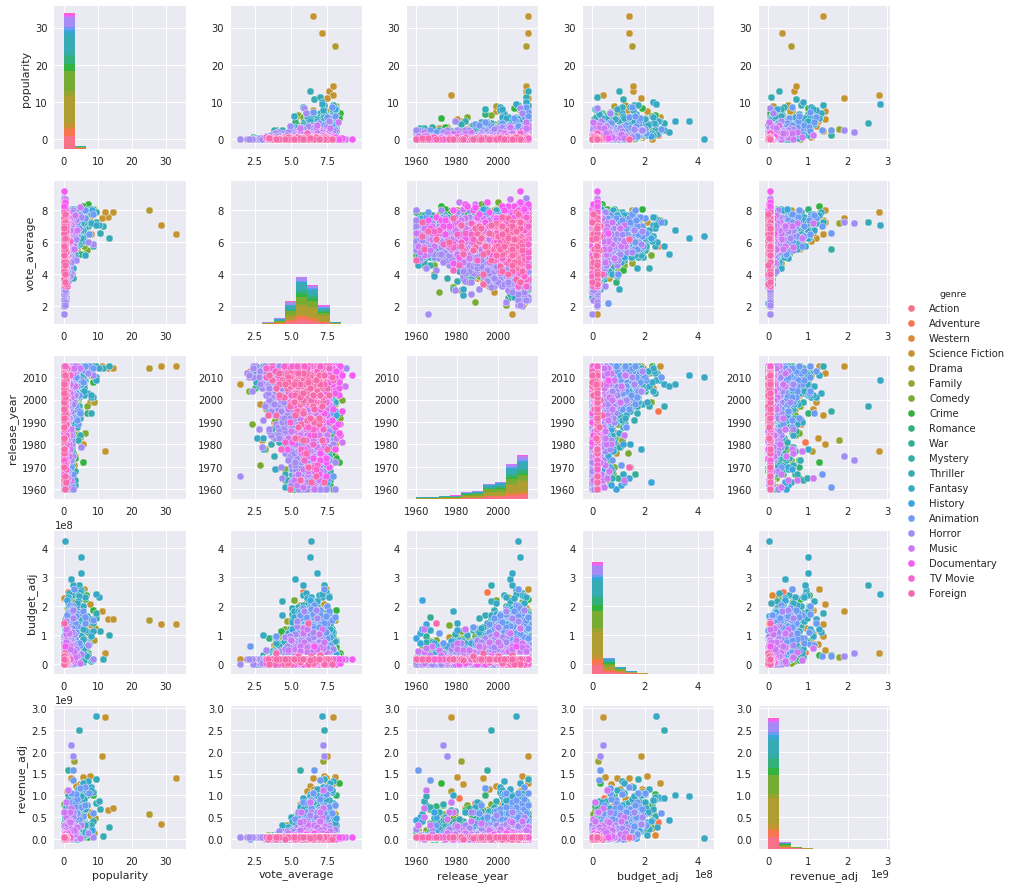

In [142]:
#Pairplot from seaborn library to create histograms and scatterplot to analyse
sns.pairplot(df_movies_final,hue = 'genre')

> Variables like revenue_adj, budget_adj and popularity are skew to the right and vote_average is distributed normally. Corellation between revenue_adj, budget_adj, popularity and vote_average have a strong positive relationships. These relationships will be analysed individually later.

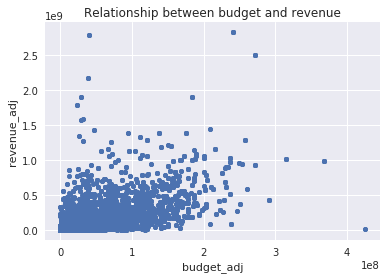

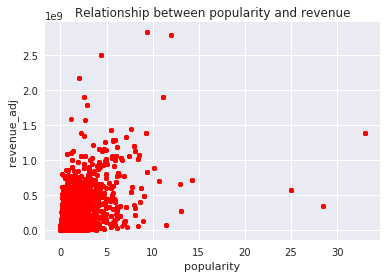

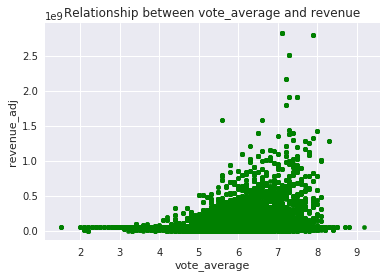

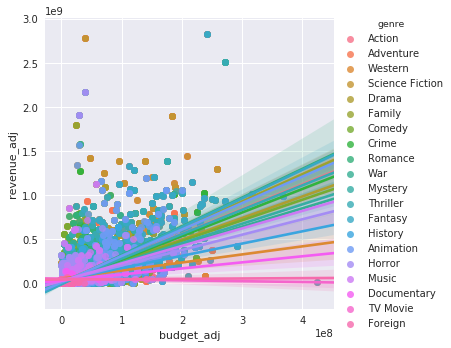

In [143]:
#Scatterplot for continuos variables to spot the relationships
df_movies_final.plot.scatter(x='budget_adj', y='revenue_adj',title= "Relationship between budget and revenue");
df_movies_final.plot.scatter(x='popularity', y='revenue_adj',color="red", title= "Relationship between popularity and revenue");
df_movies_final.plot.scatter(x='vote_average', y='revenue_adj',color="green", title= "Relationship between vote_average and revenue");
sns.set()
ax =sns.lmplot(x='budget_adj', y='revenue_adj', hue = "genre",data = df_movies_final)

>Relationship between the budget_adj and revenue_adj is strong and positive so is popularity and revenue_adj.
Vote_average and revenue_adj also increasing after a certain vote_average point.


## 1. Is popularity of genre changing over years?
>As there are many genre types in the dataset first 6 most popular types were chosen. 

In [144]:
#Dataset trimmed to choose the data after 1990 as the line charts were very densed and could not analyse the trend
df_movies_trim = df_movies_final[df_movies_final['release_year']>=1990]

#Checking the dimension of the new dataset to make sure that is big enough to conduct the analysis
df_movies_trim.shape

(40269, 9)

In [145]:
#Choose the 6 most popular genre over the years
df_movies_trim['genre'].value_counts()

Drama              7897
Comedy             5817
Thriller           4374
Action             3984
Horror             2483
Romance            2461
Adventure          2266
Crime              2123
Family             1495
Science Fiction    1492
Fantasy            1253
Mystery            1169
Animation          1040
Documentary         645
Music               492
History             472
War                 341
Foreign             186
TV Movie            155
Western             124
Name: genre, dtype: int64

In [146]:
#Create fucntion to plot line graph
def plot_line (dataset, label, color):
    dataset = dataset.sort_values('release_year')
    fig=plt.figure()
    ax=fig.add_subplot(111)
    dataset.plot('release_year','popularity',label=label, color = color, kind = 'line',ax=ax)
    ax.set_xlabel('Release Years')
    ax.set_ylabel('Populartiy')
    ax.set_title('How Popularity of genres changed over years')
    plt.show()

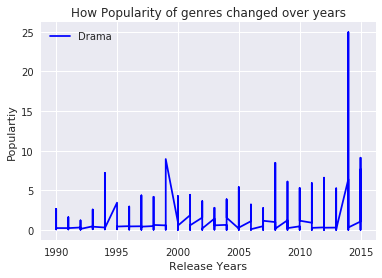

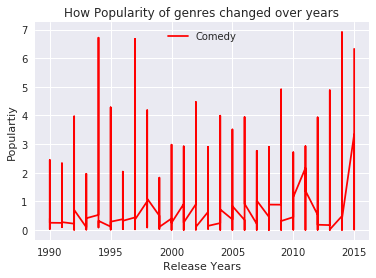

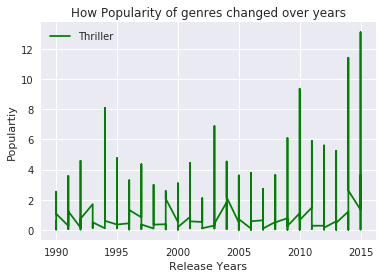

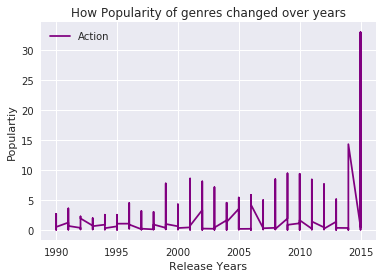

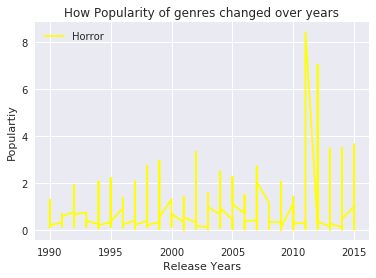

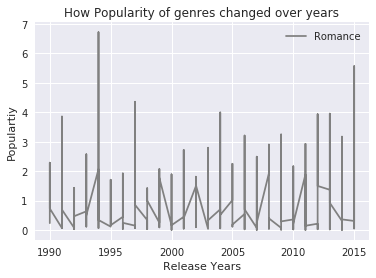

In [147]:
#Create dataset storing specific genre types

df_drama = df_movies_trim[df_movies_trim['genre']=='Drama']
df_comedy = df_movies_trim[df_movies_trim['genre']=='Comedy']
df_thriller = df_movies_trim[df_movies_trim['genre']=='Thriller']
df_action = df_movies_trim[df_movies_trim['genre']=='Action']
df_horror = df_movies_trim[df_movies_trim['genre']=='Horror']
df_romance = df_movies_trim[df_movies_trim['genre']=='Romance']


#Call plot_line function
dataset = [df_drama,df_comedy,df_thriller,df_action,df_horror,df_romance]
label = ['Drama','Comedy','Thriller','Action','Horror','Romance']
color = ['blue','red','green','purple','yellow','grey']
for i in range(len(label)):
    plot_line(dataset[i],label[i],color[i])


    

> All three types of movies' popularity seemingly increasing over years, particularly Drama has reached its highest popularity level near 2014 to 25.0 which is significantly very higher than others. Also popularity level of thriller movies also have been increasing over years and its reached its highest point in 2015 to nearly 13.0
>It is apparent from above line graph popularity level action movies are increasing tremendously and it reached it's highes in 2015 to above 30.0. Though Romance movies popularity level increasing it was more popular in 90's where it reached it's highest level in 1994. 

In [148]:
#All the genre dataset created above were appended to conduct a statistical review to check the highest popularity for each
genre_data = [df_drama,df_thriller,df_comedy,df_romance,df_horror]
df_genre = df_action.append(df_drama)
for genre in genre_data:
    df_genre = df_genre.append(genre)

df_genre.groupby(['genre','release_year']).mean()['popularity']

genre     release_year
Action    1990            0.738469
          1991            0.668164
          1992            0.611357
          1993            0.587316
          1994            0.579067
          1995            0.885044
          1996            0.885554
          1997            0.825695
          1998            0.791680
          1999            0.921620
          2000            0.743427
          2001            0.849549
          2002            0.993603
          2003            1.338167
          2004            1.068340
          2005            1.004090
          2006            0.860875
          2007            0.887422
          2008            0.997272
          2009            1.055800
          2010            1.044406
          2011            1.094490
          2012            1.218318
          2013            1.186718
          2014            1.837243
          2015            2.712595
Comedy    1990            0.495899
          1991            0.4856

>Above a summary of mean popularity of genre type for each year. Action movies achieved a mean popularity level of 20712 in 2015 and Thriller movies 1.193095 in the same year.

## 2. What are the production companies dominating the movie industry and what types of movies they produced?           

In [149]:
#Look at the production companies that produced more films 
df_movies_final['production_com'].value_counts()

Paramount Pictures                                   2963
Universal Pictures                                   1226
Warner Bros.                                         1053
Twentieth Century Fox Film Corporation                701
Columbia Pictures                                     661
Walt Disney Pictures                                  562
New Line Cinema                                       512
Metro-Goldwyn-Mayer (MGM)                             476
Columbia Pictures Corporation                         381
Touchstone Pictures                                   379
TriStar Pictures                                      370
Miramax Films                                         320
Regency Enterprises                                   221
Village Roadshow Pictures                             208
20th Century Fox                                      208
DreamWorks SKG                                        205
BBC Films                                             189
Dimension Film

In [150]:
#Choose the first 5 from the result
df_movies_5 = ['Universal Pictures','Warner Bros.','Columbia Pictures','Walt Disney Pictures','Twentieth Century Fox Film Corporation']
df_production = df_movies_trim[df_movies_trim['production_com']=='Paramount Pictures']
for movies in df_movies_5:
    df_production = df_production.append(df_movies_trim[df_movies_trim['production_com']==movies])




In [151]:
#Choose the most produced genre in the df_production dataset
df_production['genre'].value_counts()

Comedy             983
Drama              937
Action             597
Adventure          428
Thriller           405
Family             350
Romance            343
Crime              239
Fantasy            212
Science Fiction    190
Horror             189
Animation          187
Documentary        161
Mystery            109
Music               94
Foreign             49
History             48
War                 29
TV Movie            23
Western             15
Name: genre, dtype: int64

In [152]:
#Create a new dataset from df_production with the first 5 genre from above list
df_genre_5 = ['Animation','Drama','Family','Adventure']
df_prod_genre = df_production[df_production['genre']=='Action']
for genre in df_genre_5:
    df_prod_genre = df_prod_genre.append(df_production[df_production['genre']==genre])


#Summarise the mean value of popularity of movies according the genre created by companies 
df_prod_genre.groupby(['genre','production_com']).mean()['popularity']

genre      production_com                        
Action     Columbia Pictures                         1.698394
           Paramount Pictures                        0.802523
           Twentieth Century Fox Film Corporation    1.591576
           Universal Pictures                        1.293380
           Walt Disney Pictures                      1.795609
           Warner Bros.                              1.578536
Adventure  Columbia Pictures                         1.584443
           Paramount Pictures                        0.993000
           Twentieth Century Fox Film Corporation    1.824448
           Universal Pictures                        1.288942
           Walt Disney Pictures                      1.697778
           Warner Bros.                              2.294372
Animation  Columbia Pictures                         1.348188
           Paramount Pictures                        0.635146
           Twentieth Century Fox Film Corporation    1.580916
           Universal

>From the above result it can be concluded for example, Walt Disney Pictures has a highest mean value for popularity for Action movies or Warner Bros. has a highest mean value of popularity for Adventure movies.

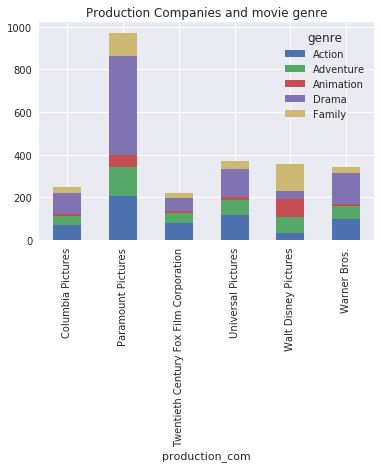

In [153]:
# Stacked bar chart to visualise the famous companies and the gnere type they produce
df_prod_genre.groupby(['production_com','genre']).size().unstack().plot(kind='bar',stacked=True, title = 'Production Companies and movie genre')
plt.show()

> From the above stacked bar Paramount Pictures has produced highes numbers movies over the years and large numbers of them are Dramas. All production companies from the above chart have produced relatively higher number of Drama's  except for Walt Disney Pictures which had produced more family movies.

## 3. How revenue generated by the top production companies has changed over years?

In [154]:
#Find the mean value of revenue produced by the companies
df_prod_genre.groupby(['genre','production_com']).mean()['revenue_adj']

genre      production_com                        
Action     Columbia Pictures                         2.255788e+08
           Paramount Pictures                        1.141858e+08
           Twentieth Century Fox Film Corporation    2.458933e+08
           Universal Pictures                        1.705612e+08
           Walt Disney Pictures                      2.767536e+08
           Warner Bros.                              2.018491e+08
Adventure  Columbia Pictures                         2.571906e+08
           Paramount Pictures                        1.360643e+08
           Twentieth Century Fox Film Corporation    3.022496e+08
           Universal Pictures                        1.910436e+08
           Walt Disney Pictures                      2.346309e+08
           Warner Bros.                              3.142435e+08
Animation  Columbia Pictures                         2.342438e+08
           Paramount Pictures                        6.788309e+07
           Twentieth Centu

> It is clear from the above statistics for example Warner Bros. has higher revenue mean value for Family movies and Adventure movies. Walt Disney Pictures has higher revenue for Animation movies.

In [155]:
#Create datasets for each type of companies

df_C = df_movies_trim[df_movies_trim['production_com']=='Columbia Pictures']
df_P = df_movies_trim[df_movies_trim['production_com']=='Paramount Pictures']
df_U = df_movies_trim[df_movies_trim['production_com']=='Universal Pictures']
df_W = df_movies_trim[df_movies_trim['production_com']=='Walt Disney Pictures']
df_War = df_movies_trim[df_movies_trim['production_com']=='Warner Bros.']
df_New = df_movies_trim[df_movies_trim['production_com']=='New Line Cinema']


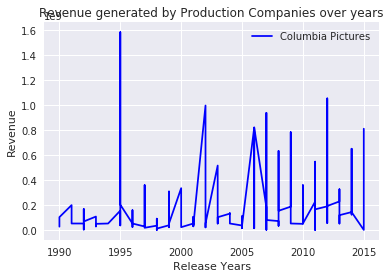

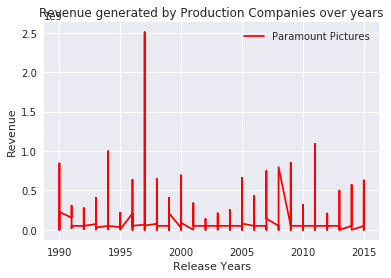

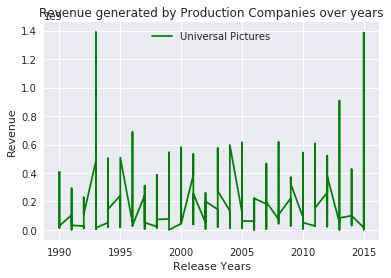

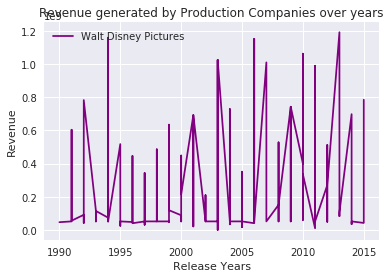

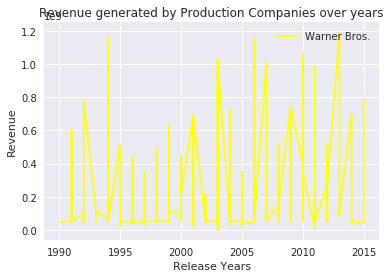

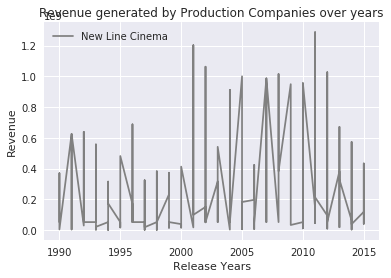

In [156]:
#Create line plots for Production_com vs Release_year
dataset = [df_C,df_P,df_U,df_W,df_W,df_War,df_New]
label = ['Columbia Pictures','Paramount Pictures','Universal Pictures','Walt Disney Pictures','Warner Bros.','New Line Cinema']

#create function to plot line graph
def plot_line2(dataset,label,color):
    dataset = dataset.sort_values('release_year')
    fig=plt.figure()
    ax=fig.add_subplot(111)
    dataset.plot('release_year','revenue_adj',label=label, color =color, kind = 'line',ax=ax)
    ax.set_xlabel('Release Years')
    ax.set_ylabel('Revenue')
    ax.set_title('Revenue generated by Production Companies over years')
    plt.show()
    
#call plot_line2 method   
for i in range(len(label)):
    plot_line2(dataset[i],label[i],color[i])
    


>Above two line graphs don't show a definite correlation between the revenue generated by the production companies. Paramount Pictures achieved its highest revenue around in 1998 and Columbia in 1995. Universal Pictures revenue is gradually going higher with the year and generated a high revenue in 1992 and 2015. As there is less correlations with the chosen production companies, decided to choose the highest revenue companies to see any relationships.  

>Since the above companies had produced more movies over the years they have chosen for this particular question. But also interested to see what are the other companies had produced higher revenues even for few movies.

In [157]:
#Find the production companies generated highest revenue
grouped = df_movies_trim.groupby(['production_com']).mean()['revenue_adj'].reset_index()
grouped.sort_values('revenue_adj', ascending=False)


,production_com,revenue_adj
5120,Truenorth Productions,1.902723e+09
4169,Revolution Sun Studios,1.292632e+09
3964,Prime Focus,1.292632e+09
4398,Second Mate Productions,1.081672e+09
1431,Disney Enterprises,1.024887e+09
3801,Patalex IV Productions Limited,1.000353e+09
1196,Cool Music,9.866889e+08
4975,The Saul Zaentz Company,9.425952e+08
49,3Foot7,8.797523e+08
2284,Heineken Branded Entertainment,8.755011e+08


>These are top production companies produced higher revenue despite the number of movies.

In [158]:
#Create datasets for each type of companies that produced highest revunues
df_T = df_movies_trim[df_movies_trim['production_com']=='Truenorth Productions']
df_R = df_movies_trim[df_movies_trim['production_com']=='Revolution Sun Studios']
df_Pr = df_movies_trim[df_movies_trim['production_com']=='Prime Focus']
df_S = df_movies_trim[df_movies_trim['production_com']=='Second Mate Productions']

In [159]:
df_T.shape

(3, 9)

In [160]:
df_R.shape

(3, 9)

In [161]:
df_Pr.shape

(3, 9)

In [162]:
df_S.shape

(6, 9)

>But these companies have produced very few movies for the entire year span, so the purpose cannot be carry on.

## 4. Do companies produced popular movies genrates high revenue?

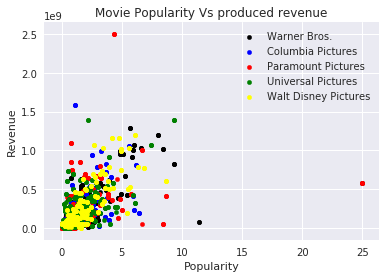

In [163]:
#Plot a line graph
fig=plt.figure()
ax=fig.add_subplot(111)
df_War.plot.scatter('popularity','revenue_adj',label='Warner Bros.', color ='black',ax=ax)
df_C.plot.scatter('popularity','revenue_adj',label='Columbia Pictures', color ='blue',ax=ax)
df_P.plot.scatter('popularity','revenue_adj',label='Paramount Pictures', color ='red', ax=ax)
df_U.plot.scatter('popularity','revenue_adj',label='Universal Pictures', color ='green', ax=ax)
df_W.plot.scatter('popularity','revenue_adj',label='Walt Disney Pictures', color ='yellow',ax=ax)

ax.set_xlabel('Popularity')
ax.set_ylabel('Revenue')
ax.set_title('Movie Popularity Vs produced revenue')
plt.show()

> It is apparent, revenue created by movies depends on the popularity level from the above graph with a high correlation. Paramount Pictures generated a exceptionally high revenue for the movie popularity around 4.5 and  genrated a quite low revenue for a high popularity around 25. 

## 5. Does budgeting increases the popularity of a movie?

In [164]:
#Find the minimum, centiles and maximum values of popularity
a = np.percentile(df_movies_final['popularity'], 25)
b = np.percentile(df_movies_final['popularity'], 50)
c = np.percentile(df_movies_final['popularity'], 75)
d = np.max(df_movies_final['popularity'])
e = np.min(df_movies_final['popularity'])

#Create a bin edge
bin_edges = [ e, a , b, c,d ]
bin_names = [ 'low','medium' ,'moderate' , 'high']
df_movies_final['popularity_levels'] = pd.cut(df_movies_final['popularity'], bin_edges, labels=bin_names)


In [165]:
#subset the dataset to differnet levels of popularity
pop_high = df_movies_final.query('popularity_levels=="high"')
pop_mod_high = df_movies_final.query('popularity_levels=="moderate"')
pop_medium = df_movies_final.query('popularity_levels=="medium"')
pop_low = df_movies_final.query('popularity_levels=="low"')

#Finding the mean value for budjet for each subset
mean_pop_high = pop_high['budget_adj'].mean()
mean_pop_mod_high = pop_mod_high['budget_adj'].mean()
mean_pop_medium = pop_medium['budget_adj'].mean()
mean_pop_low = pop_low['budget_adj'].mean()

<Container object of 4 artists>

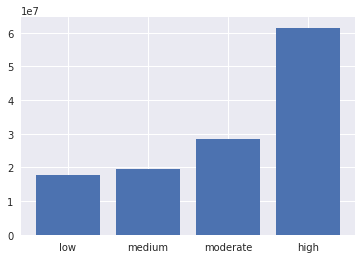

In [166]:
#Plot a bar graph 
locations = [1,2,3,4]
heights = [mean_pop_low,mean_pop_medium,mean_pop_mod_high,mean_pop_high]
labels = ['low','medium','moderate','high']
plt.bar(locations, heights, tick_label=labels)

>Movies with lower popularity have a low mean value of budgets whereas higher popularity level movies have a higher budget value. It can be concluded producgtion companies invested on budget recieved a higher popularity level for their movies.

## 6. Do productions companies team-up with top most directors to generate a higher revenue?

In [167]:
#Create df_dir to hold mean value of revenue_adj. 
df_dir = df_movies_trim.groupby(['production_com','director']).mean()['revenue_adj'].reset_index()


#Find the minimum, centiles and maximum values of revenue
#df_movie_trim used to analyse the trend of movies year after 1990
a = np.percentile(df_dir['revenue_adj'], 25)
b = np.percentile(df_dir['revenue_adj'], 50)
c = np.percentile(df_dir['revenue_adj'], 75)
d = np.max(df_dir['revenue_adj'])
e = np.min(df_dir['revenue_adj'])


#categorise the revenue_adj by its values; low to very high
revenue = []
for row in df_dir['revenue_adj']:
    
    if row >=e and row <=a:
        revenue.append('Low')
    elif row >=a and row <=b:
        revenue.append('Moderate')
    elif row >=b and row <=c:
        revenue.append('High')
    elif row >=c and row <=d:
        revenue.append('Very High')

#Add the new column revenue to df_dir
df_dir['revenue'] = revenue


In [168]:
#Sort the df_dir by ascending order of revenue_adj
df_sort = df_dir.sort_values('revenue_adj', ascending=False)

#Find the top 7 production_companies who produced more movies according to the mean revenue_adj
df_sort.head(7)

,production_com,director,revenue_adj,revenue
6163,Ingenious Film Partners,James Cameron,2.827124e+09,Very High
3776,Dune Entertainment,James Cameron,2.827124e+09,Very High
9748,Paramount Pictures,James Cameron,2.506406e+09,Very High
13875,Twentieth Century Fox Film Corporation,James Cameron,2.139418e+09,Very High
13798,Truenorth Productions,J.J. Abrams,1.902723e+09,Very High
7288,Lucasfilm,J.J. Abrams,1.902723e+09,Very High
2592,Columbia Pictures,Irwin Winkler,1.583050e+09,Very High


In [169]:
#Create a seperate dataframe with the above higher mean value generating production companies

df_prod = df_sort[df_sort['production_com']=='Ingenious Film Partners']
df_prod = df_prod.append(df_sort[df_sort['production_com']=='Dune Entertainment'])
df_prod = df_prod.append(df_sort[df_sort['production_com']=='Twentieth Century Fox Film Corporation'])
df_prod = df_prod.append(df_sort[df_sort['production_com']=='Paramount Pictures'])
df_prod = df_prod.append(df_sort[df_sort['production_com']=='Truenorth Productions'])
df_prod = df_prod.append(df_sort[df_sort['production_com']=='Lucasfilm'])
df_prod_= df_prod.append(df_sort[df_sort['production_com']=='Columbia Pictures'])



In [170]:
#Find the most directors who worked with above companies
df_prod['director'].value_counts()

James Cameron                  4
Len Wiseman                    3
Betty Thomas                   3
Shawn Levy                     3
Cameron Crowe                  3
Mark Waters                    3
Matthew Vaughn                 3
Steven Spielberg               3
Oliver Stone                   3
Chris Columbus                 3
Paul Feig                      3
Stefen Fangmeier               3
Akiva Schaffer                 3
Ridley Scott                   3
James Wong                     3
M. Night Shyamalan             3
J.J. Abrams                    3
Peter Weir                     2
Michael Hoffman                2
Tony Scott                     2
Tim Story                      2
Paul W.S. Anderson             2
James Wan                      2
David Fincher                  2
Darren Aronofsky               2
Baz Luhrmann                   2
Josh Trank                     2
Rob Letterman                  2
Rick Famuyiwa                  2
Wes Anderson                   2
          

In [171]:
#Create a new dataset df_directors from df_prod to extract the rows with the above 6 directors

directors = ['Paul Feig','Betty Thomas','Oliver Stone','M. Night Shyamalan','Matthew Vaughn']
df_directors = df_prod[df_prod['director']=='James Cameron']
for direc in directors:
    df_directors = df_directors.append(df_prod[df_prod['director']==direc])

df_directors.head(10)

,production_com,director,revenue_adj,revenue
6163,Ingenious Film Partners,James Cameron,2.827124e+09,Very High
3776,Dune Entertainment,James Cameron,2.827124e+09,Very High
13875,Twentieth Century Fox Film Corporation,James Cameron,2.139418e+09,Very High
9748,Paramount Pictures,James Cameron,2.506406e+09,Very High
6171,Ingenious Film Partners,Paul Feig,1.485243e+08,Very High
13923,Twentieth Century Fox Film Corporation,Paul Feig,1.826686e+08,Very High
10079,Paramount Pictures,Paul Feig,5.136900e+07,Moderate
3763,Dune Entertainment,Betty Thomas,4.435889e+07,Moderate
13841,Twentieth Century Fox Film Corporation,Betty Thomas,3.065097e+08,Very High
9458,Paramount Pictures,Betty Thomas,5.446327e+07,Very High


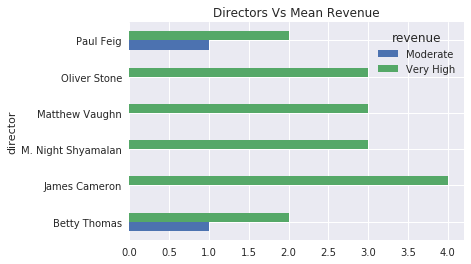

In [172]:
# Create stack bar chart
df = pd.DataFrame(df_directors, columns = ['production_com', 'director','revenue'])

df.groupby(['director','revenue']).size().unstack().plot(kind='barh', title = 'Directors Vs Mean Revenue')
plt.show()


> Above bar chart shows the top 6 directors in the industry and how well their movies generated a mean revenue over the years.  James Cameron had genrated most numbers of higher mean revenue movies over the years. Oliver Stone, Mathew Vaughn and Night Shyamalan also have generated a higher mean revenue_adj equally. There are no directors from the above had produced movies generated high ro low revenue.

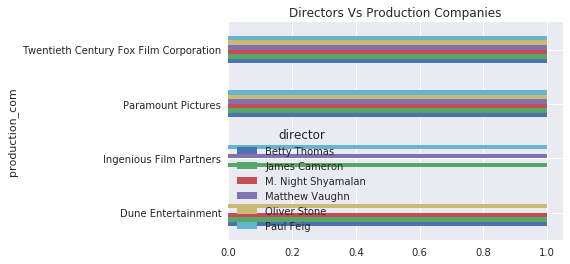

In [173]:
# Create stack bar chart
df = pd.DataFrame(df_directors, columns = ['production_com', 'director','revenue'])

df.groupby(['production_com','director']).size().unstack().plot(kind='barh', title = 'Directors Vs Production Companies')
plt.show()

>From the above chart it is clear that Paromount Pictures and Twentieth Century Fox had worked with all the above dirctors.  It is evident from the chart that Truenorth Productions ans Lucas Film haven't work with any of these directors!
It should be interesting to find directors these companies had work with!

In [174]:
df_new = df_prod[df_prod['production_com']=='Truenorth Productions']
df_new = df_new.append(df_prod[df_prod['production_com']=='Lucasfilm'])
df_new.head()

,production_com,director,revenue_adj,revenue
13798,Truenorth Productions,J.J. Abrams,1.902723e+09,Very High
7288,Lucasfilm,J.J. Abrams,1.902723e+09,Very High
7287,Lucasfilm,George Lucas,9.820999e+08,Very High
7290,Lucasfilm,Steven Spielberg,7.966945e+08,Very High
7285,Lucasfilm,Dave Filoni,6.915595e+07,Very High


>These two companies had worked with different directors and had achieved a Very high revenue!

<a id='conclusions'></a>
## Conclusions

>This analysis provides a good insight of Tmdb movie dataset; relationships between budjet and revenue, how popularity of a movie influence the  the revenue generation, how different production companies choose genre types to spike revenue, how production companies teamed up with successful directors to yield a revenue etc.

>I have chosen few variables to see how they influence the revenue produced by movies. Some scatterplot graphs revealed that revenue of a movie is highly depends on the budget and popularity of a movie. Also poopularity of a movie increases when the vote_average reached a certain point.

>Popularity of genre types generally increased over the years. Especially actions movies and Dramas had reached a high popularity level in recent years.

>Paramount Pictures, Universal Pictures and Warner Bros. had produced higher number of movies over the years; Drama's , Actions and Adventure movies among them.

>There is no absolute relationship found to summarise the revenue created by production compnies increased over the years. Though revenue generated by Universal Pictures relatively lower than other chosen companies but it was increasing over the years and achieved its highest in 2015. But revenue genrated by other companies were fluctuating through out the years.

>It is obvious when popularity of a movie increases the revenue had gone high. Notably Paramount Pictures had achieved a higher revenue even when the popularity is relatively lower, also it had generated  lower revenue for highly popular movies.

>It is evident when budgetting of a movie increases it's popularity also had increased.

>Paramount Pictures and Twentieth Century Fox Film Coperation had teamed up with the directors who directored movies which created a higher revenue. Truenorth Productions and Truenorth Productions had worked with other directors and generated a very high revenue.

### Limitations
>Since the metadata is not available few of the variables' meaning of them were not clear. For example Popularity_level, not clear it's after the revenue recorded or before it recorded. But here I assumed its before the revenue recorded.

> There were significant number of missing values entered as 0 in columns budget_adj and Revenue_adj below the 50th centile.  Those were imputed with the mean values. Thus the dataset is biased to budget and revenue values over its mean value. 

>Dataset has a year span of 1960 - 2015, entertainment industries drastically changes over years with technology, peoples' preference and generation gap. So it wouldn't be a better comparison for movie industry in 1960 to movie industry in 2015. A better plan is to split the dataset and analyse and compare them.



### References
>https://pandas.pydata.org

>https://matplotlib.org/

>https://stackoverflow.com

>https://seaborn.pydata.org/generated/seaborn.pairplot.html




In [175]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0